In [1]:
import pandas as pd
import numpy as np

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

In [3]:
# warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
def check_missing(df):
    """
    Returna uma Series com o percentual de missing data em cada coluna. 
    """
    import pandas
    if isinstance(df, pandas.core.frame.DataFrame):
        missing = (((df.isnull().sum()/df.shape[0])*100).round(2)).sort_values(ascending = False)
        return missing
    return -1


In [5]:
def check_duplicate_lines(data_frame):
    if data_frame.shape[0]!=data_frame.drop_duplicates().shape[0]:
        duplicate_lines = dfata_frame.shape[0]-data_frame.drop_duplicates().shape[0]
        return f'{duplicated_lines} duplicate lines'
    return '0 duplicate lines'


In [6]:
def show_percentage_missing(df):
    import matplotlib.pyplot as plt
    
    "Mostra o percentual de missing em cada coluna graficamente."
    missing = check_missing(df)
    plt.figure(figsize = (10, 15))
    plt.barh(y = missing.index, width = missing.values, color = 'darkgray', height = 0.7, align = 'edge')
    plt.xlabel('% of missing values', size = 10)
    plt.ylabel('Columns', size = 10)
    plt.title('Missing Values', fontdict = {'color':'gray', 'weight':'bold', 'size': 12})
    plt.grid(alpha = 0.5)
    plt.show()
    

In [7]:
pip install factor_analyzer==0.3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40394 sha256=5ef525009083cffba094123b2466e01bb6ce71b463ed030fc5d4efceb962b3b8
  Stored in directory: /root/.cache/pip/wheels/b1/d4/b5/9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor_analyzer


In [8]:
from factor_analyzer import FactorAnalyzer

In [12]:
df = pd.read_excel('/content/sample_data/dados cluster balancete.xlsx')

In [13]:
df.head()

,Código,Descrição da Conta,Saldo Anterior,Débito,Crédito,Saldo Atual,Flag
0,1,ATIVO,"461.309.963,45DB",2.173464e+08,2.096699e+08,"468.986.454,77DB",AT
1,1.1,ATIVO CIRCULANTE,"116.126.131,18DB",1.982429e+08,1.981336e+08,"116.235.464,30DB",AT
2,1.1.1,DISPONIVEL,"11.388.021,70DB",1.373265e+08,1.347340e+08,"13.980.554,13DB",AT
3,1.1.1.02,BANCOS CONTA MOVIMENTO,"3.878.515,57DB",1.015352e+08,1.033109e+08,"2.102.801,14DB",AT
4,1.1.1.02.01,Bco Santander (Brasil) S/A 03678-8,0,1.605298e+07,1.605298e+07,0,AT


Separar os dados Numéricos de strings em saldo Anterior e Saldo Atual 

In [14]:
df['DB/CR'] = df['Saldo Anterior'].str.slice(-2)

In [15]:
df['DB/CR Saldo Atual'] = df['Saldo Atual'].str.slice(-2)

In [16]:
df.head()

,Código,Descrição da Conta,Saldo Anterior,Débito,Crédito,Saldo Atual,Flag,DB/CR,DB/CR Saldo Atual
0,1,ATIVO,"461.309.963,45DB",2.173464e+08,2.096699e+08,"468.986.454,77DB",AT,DB,DB
1,1.1,ATIVO CIRCULANTE,"116.126.131,18DB",1.982429e+08,1.981336e+08,"116.235.464,30DB",AT,DB,DB
2,1.1.1,DISPONIVEL,"11.388.021,70DB",1.373265e+08,1.347340e+08,"13.980.554,13DB",AT,DB,DB
3,1.1.1.02,BANCOS CONTA MOVIMENTO,"3.878.515,57DB",1.015352e+08,1.033109e+08,"2.102.801,14DB",AT,DB,
4,1.1.1.02.01,Bco Santander (Brasil) S/A 03678-8,0,1.605298e+07,1.605298e+07,0,AT,NaN,NaN


Remomevendo DB E CR das colunas Saldo atual e Saldo Anterior 

In [17]:
df['Saldo Anterior'] =  df['Saldo Anterior'].str.replace('DB','')

In [18]:
df['Saldo Anterior']= df['Saldo Anterior'].str.replace('CR','')

In [19]:
df['Saldo Atual'] =  df['Saldo Atual'].str.replace('DB','')

In [20]:
df['Saldo Atual'] =  df['Saldo Atual'].str.replace('CR','')

In [21]:
df.head()

,Código,Descrição da Conta,Saldo Anterior,Débito,Crédito,Saldo Atual,Flag,DB/CR,DB/CR Saldo Atual
0,1,ATIVO,"461.309.963,45",2.173464e+08,2.096699e+08,"468.986.454,77",AT,DB,DB
1,1.1,ATIVO CIRCULANTE,"116.126.131,18",1.982429e+08,1.981336e+08,"116.235.464,30",AT,DB,DB
2,1.1.1,DISPONIVEL,"11.388.021,70",1.373265e+08,1.347340e+08,"13.980.554,13",AT,DB,DB
3,1.1.1.02,BANCOS CONTA MOVIMENTO,"3.878.515,57",1.015352e+08,1.033109e+08,"2.102.801,14",AT,DB,
4,1.1.1.02.01,Bco Santander (Brasil) S/A 03678-8,NaN,1.605298e+07,1.605298e+07,NaN,AT,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Código              462 non-null    object 
 1   Descrição da Conta  460 non-null    object 
 2   Saldo Anterior      424 non-null    object 
 3   Débito              460 non-null    float64
 4   Crédito             460 non-null    float64
 5   Saldo Atual         420 non-null    object 
 6   Flag                461 non-null    object 
 7   DB/CR               424 non-null    object 
 8   DB/CR Saldo Atual   420 non-null    object 
dtypes: float64(2), object(7)
memory usage: 32.9+ KB


In [23]:
df.describe()

,Débito,Crédito
count,4.600000e+02,4.600000e+02
mean,3.268727e+06,3.268727e+06
std,1.711954e+07,1.708253e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,2.049439e+04,3.809025e+03
75%,4.831155e+05,3.807236e+05
max,2.173464e+08,2.096699e+08


Quantidade de valor únicos nas colunas



In [24]:
df.nunique()

Código                461
Descrição da Conta    446
Saldo Anterior        367
Débito                300
Crédito               261
Saldo Atual           368
Flag                    3
DB/CR                   2
DB/CR Saldo Atual       3
dtype: int64

In [25]:
# verifica o percentual de missing data
check_missing(df)

Saldo Atual           9.87
DB/CR Saldo Atual     9.87
Saldo Anterior        9.01
DB/CR                 9.01
Descrição da Conta    1.29
Débito                1.29
Crédito               1.29
Flag                  1.07
Código                0.86
dtype: float64

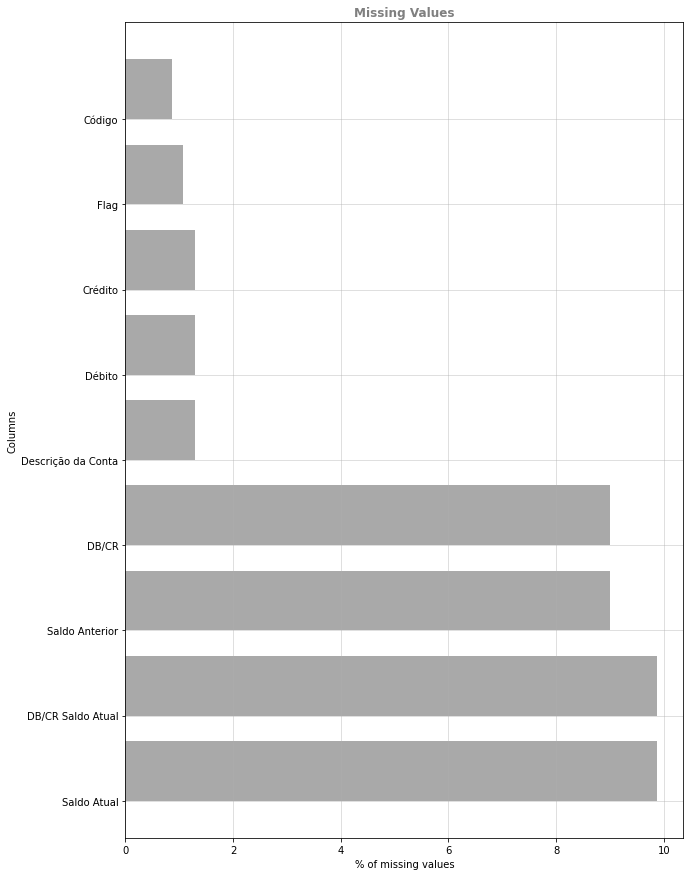

In [26]:
show_percentage_missing(df)

Convertendo as coluans para string e Númerico 

In [27]:
df['Débito'] = df['Débito'].astype(float)

In [28]:
df['Crédito'] = df['Crédito'].astype(float)

In [29]:
df['Flag'] = df['Flag'].astype("string")

In [30]:
df['Descrição da Conta'] = df['Descrição da Conta'].astype("string")

In [32]:
df['Saldo Atual'] = df['Saldo Atual'].fillna(0)

In [140]:
df['Saldo Atual'] = df['Saldo Atual'].astype("string")

In [141]:
df['Saldo Atual'].head()

0     468.986.454,77
1     116.235.464,30
2      13.980.554,13
3    2.102.801,14   
4               <NA>
Name: Saldo Atual, dtype: string

In [33]:
df['Saldo Atual'] = df['Saldo Atual'].str.replace('.', '')

In [34]:
df['Saldo Atual'].head()

0     468986454,77
1     116235464,30
2      13980554,13
3    2102801,14   
4              NaN
Name: Saldo Atual, dtype: object

In [35]:
df['Saldo Atual'] = df['Saldo Atual'].str.replace(',', '.')

In [36]:
df['Saldo Atual'].head()

0     468986454.77
1     116235464.30
2      13980554.13
3    2102801.14   
4              NaN
Name: Saldo Atual, dtype: object

In [37]:
df['Saldo Atual'] = df['Saldo Atual'].astype(float)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Código              462 non-null    object 
 1   Descrição da Conta  460 non-null    string 
 2   Saldo Anterior      424 non-null    object 
 3   Débito              460 non-null    float64
 4   Crédito             460 non-null    float64
 5   Saldo Atual         420 non-null    float64
 6   Flag                461 non-null    string 
 7   DB/CR               424 non-null    object 
 8   DB/CR Saldo Atual   420 non-null    object 
dtypes: float64(3), object(4), string(2)
memory usage: 32.9+ KB


In [38]:
df['Saldo Anterior'] = df['Saldo Anterior'].str.replace('.', '')

In [39]:
df['Saldo Anterior'].head()

0    461309963,45
1    116126131,18
2     11388021,70
3      3878515,57
4             NaN
Name: Saldo Anterior, dtype: object

In [40]:
df['Saldo Anterior'] = df['Saldo Anterior'].astype('string')

In [41]:
df['Saldo Anterior'] = df['Saldo Anterior'].str.replace(',', '.')

In [42]:
df['Saldo Anterior']

0      461309963.45
1      116126131.18
2       11388021.70
3        3878515.57
4              <NA>
           ...     
461            <NA>
462            <NA>
463            <NA>
464            <NA>
465            <NA>
Name: Saldo Anterior, Length: 466, dtype: string

In [43]:
df['Saldo Anterior'] = df['Saldo Anterior'].astype(float)

In [44]:
df.head()

,Código,Descrição da Conta,Saldo Anterior,Débito,Crédito,Saldo Atual,Flag,DB/CR,DB/CR Saldo Atual
0,1,ATIVO,4.613100e+08,2.173464e+08,2.096699e+08,4.689865e+08,AT,DB,DB
1,1.1,ATIVO CIRCULANTE,1.161261e+08,1.982429e+08,1.981336e+08,1.162355e+08,AT,DB,DB
2,1.1.1,DISPONIVEL,1.138802e+07,1.373265e+08,1.347340e+08,1.398055e+07,AT,DB,DB
3,1.1.1.02,BANCOS CONTA MOVIMENTO,3.878516e+06,1.015352e+08,1.033109e+08,2.102801e+06,AT,DB,
4,1.1.1.02.01,Bco Santander (Brasil) S/A 03678-8,NaN,1.605298e+07,1.605298e+07,NaN,AT,NaN,NaN


__________________________________________________________________

In [169]:
df.columns

Index(['Código', 'Descrição da Conta', 'Saldo Anterior', 'Débito', 'Crédito',
       'Saldo Atual', 'Flag', 'DB/CR', 'DB/CR Saldo Atual'],
      dtype='object')

Criando Dummy 

In [45]:
df_dummies = pd.get_dummies(df, columns=['Flag', 'DB/CR', 'DB/CR Saldo Atual'])

In [46]:
df_dummies.head()

,Código,Descrição da Conta,Saldo Anterior,Débito,Crédito,Saldo Atual,Flag_AT,Flag_FA,Flag_PAS,DB/CR_CR,DB/CR_DB,DB/CR Saldo Atual_,DB/CR Saldo Atual_CR,DB/CR Saldo Atual_DB
0,1,ATIVO,4.613100e+08,2.173464e+08,2.096699e+08,4.689865e+08,1,0,0,0,1,0,0,1
1,1.1,ATIVO CIRCULANTE,1.161261e+08,1.982429e+08,1.981336e+08,1.162355e+08,1,0,0,0,1,0,0,1
2,1.1.1,DISPONIVEL,1.138802e+07,1.373265e+08,1.347340e+08,1.398055e+07,1,0,0,0,1,0,0,1
3,1.1.1.02,BANCOS CONTA MOVIMENTO,3.878516e+06,1.015352e+08,1.033109e+08,2.102801e+06,1,0,0,0,1,1,0,0
4,1.1.1.02.01,Bco Santander (Brasil) S/A 03678-8,NaN,1.605298e+07,1.605298e+07,NaN,1,0,0,0,0,0,0,0


In [48]:
df_dummies['Saldo Atual'] = df_dummies['Saldo Atual'].fillna(0)

In [51]:
df_dummies['Saldo Anterior'] = df_dummies['Saldo Anterior'].fillna(0)

In [50]:
df_dummies.head()

,Código,Descrição da Conta,Saldo Anterior,Débito,Crédito,Saldo Atual,Flag_AT,Flag_FA,Flag_PAS,DB/CR_CR,DB/CR_DB,DB/CR Saldo Atual_,DB/CR Saldo Atual_CR,DB/CR Saldo Atual_DB
0,1,ATIVO,4.613100e+08,2.173464e+08,2.096699e+08,4.689865e+08,1,0,0,0,1,0,0,1
1,1.1,ATIVO CIRCULANTE,1.161261e+08,1.982429e+08,1.981336e+08,1.162355e+08,1,0,0,0,1,0,0,1
2,1.1.1,DISPONIVEL,1.138802e+07,1.373265e+08,1.347340e+08,1.398055e+07,1,0,0,0,1,0,0,1
3,1.1.1.02,BANCOS CONTA MOVIMENTO,3.878516e+06,1.015352e+08,1.033109e+08,2.102801e+06,1,0,0,0,1,1,0,0
4,1.1.1.02.01,Bco Santander (Brasil) S/A 03678-8,NaN,1.605298e+07,1.605298e+07,0.000000e+00,1,0,0,0,0,0,0,0


In [58]:
X = df_dummies.iloc[:, 2:12]

In [59]:
X

,Saldo Anterior,Débito,Crédito,Saldo Atual,Flag_AT,Flag_FA,Flag_PAS,DB/CR_CR,DB/CR_DB,DB/CR Saldo Atual_
0,4.613100e+08,2.173464e+08,2.096699e+08,4.689865e+08,1,0,0,0,1,0
1,1.161261e+08,1.982429e+08,1.981336e+08,1.162355e+08,1,0,0,0,1,0
2,1.138802e+07,1.373265e+08,1.347340e+08,1.398055e+07,1,0,0,0,1,0
3,3.878516e+06,1.015352e+08,1.033109e+08,2.102801e+06,1,0,0,0,1,1
4,0.000000e+00,1.605298e+07,1.605298e+07,0.000000e+00,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
461,0.000000e+00,NaN,NaN,0.000000e+00,0,0,0,0,0,0
462,0.000000e+00,NaN,NaN,0.000000e+00,0,0,0,0,0,0
463,0.000000e+00,NaN,NaN,0.000000e+00,0,0,0,0,0,0
464,0.000000e+00,NaN,NaN,0.000000e+00,0,0,0,0,0,0


In [68]:
fa = FactorAnalyzer(n_factors=8, rotation='varimax')

In [69]:
fa.fit(X)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [70]:
ev, v = fa.get_eigenvalues()
ev

array([2.98935957e+00, 2.66332293e+00, 1.55476246e+00, 1.19003665e+00,
       8.34411748e-01, 5.70259495e-01, 1.63776229e-01, 1.90349076e-02,
       1.41042413e-02, 9.31764162e-04])

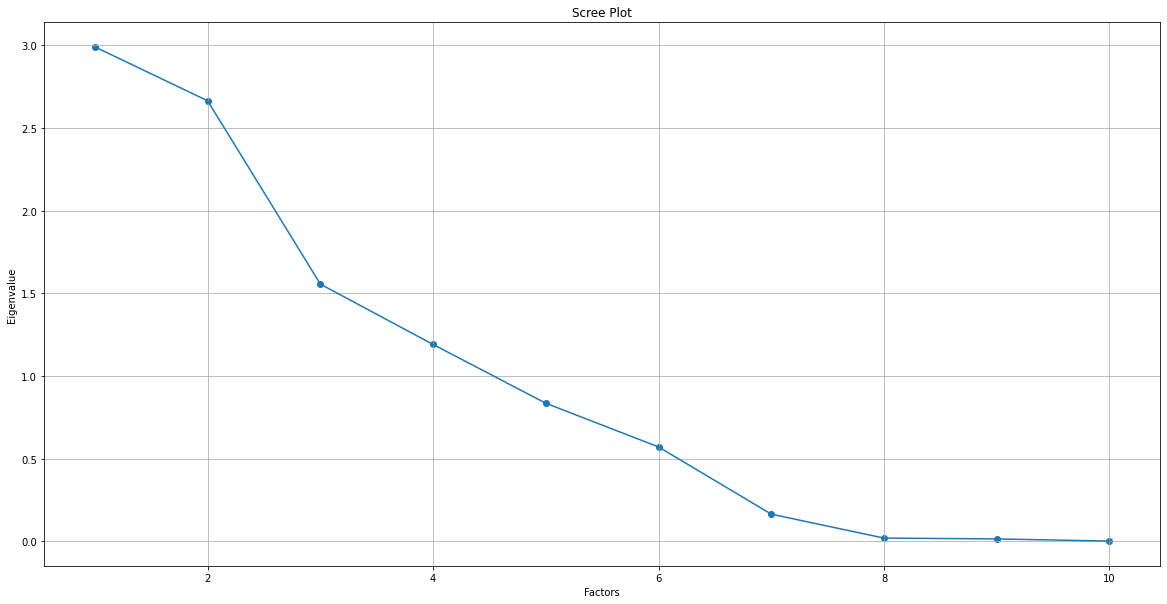

In [71]:
plt.figure(figsize=(20,10))
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')

plt.grid()
plt.show()

In [73]:
fa = FactorAnalyzer(n_factors=8, rotation=None)
fa.fit(X)

FactorAnalyzer(n_factors=8, rotation=None, rotation_kwargs={})

In [74]:
L = fa.loadings_
np.round(L,2)

array([[ 0.68,  0.46,  0.26, -0.49, -0.1 , -0.03, -0.01,  0.  ],
       [ 0.76,  0.28, -0.19,  0.52, -0.15, -0.09,  0.  ,  0.07],
       [ 0.77,  0.32, -0.17,  0.52, -0.03, -0.05, -0.  , -0.08],
       [ 0.69,  0.46,  0.27, -0.49, -0.08, -0.02, -0.01, -0.  ],
       [ 0.37, -0.4 , -0.73, -0.3 ,  0.16, -0.19,  0.04,  0.  ],
       [ 0.07, -0.31,  0.89,  0.26,  0.11, -0.17,  0.02,  0.  ],
       [-0.45,  0.74, -0.11,  0.06, -0.28,  0.36,  0.03, -0.  ],
       [-0.4 ,  0.77, -0.01,  0.03,  0.21, -0.26,  0.25,  0.  ],
       [ 0.45, -0.78,  0.09, -0.03, -0.22,  0.26,  0.24, -0.  ],
       [ 0.4 ,  0.18,  0.04,  0.05,  0.6 ,  0.41, -0.  ,  0.01]])

In [75]:
fa.get_factor_variance()

(array([2.96233338, 2.63352801, 1.54606471, 1.18324856, 0.60614533,
        0.51592521, 0.12242483, 0.0118163 ]),
 array([0.29623334, 0.2633528 , 0.15460647, 0.11832486, 0.06061453,
        0.05159252, 0.01224248, 0.00118163]),
 array([0.29623334, 0.55958614, 0.71419261, 0.83251747, 0.893132  ,
        0.94472452, 0.956967  , 0.95814863]))

In [78]:
fa = FactorAnalyzer(n_factors=8, rotation='varimax')
fa.fit(X)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [79]:
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = X.columns
L.columns = ['FA1','FA2','FA3','FA4','FA5','FA6','FA7','FA8']
L

,FA1,FA2,FA3,FA4,FA5,FA6,FA7,FA8
Saldo Anterior,-0.016772,0.976748,0.181743,-0.000476,0.000606,0.098457,0.003338,-0.001297
Débito,0.056408,0.179132,0.973206,-0.048615,0.016218,0.065893,0.003054,-0.074988
Crédito,0.014273,0.191555,0.956804,-0.034368,0.035097,0.183979,-0.001472,0.079785
Saldo Atual,-0.018366,0.974056,0.179839,0.010823,0.006730,0.124314,0.000855,0.001703
Flag_AT,0.261192,0.001849,0.073767,-0.768618,0.564708,0.024760,0.046022,0.000297
Flag_FA,0.181473,0.011469,-0.039737,0.940971,0.271715,0.017071,0.028539,0.000346
Flag_PAS,-0.459817,-0.007918,-0.034455,-0.130822,-0.863706,-0.042619,0.008411,-0.000294
DB/CR_CR,-0.904452,0.043072,-0.030646,0.018977,-0.216264,0.005259,0.238149,0.000274
DB/CR_DB,0.936008,0.004210,0.042565,0.055411,0.215674,0.005346,0.252443,-0.000703
DB/CR Saldo Atual_,0.001012,0.159144,0.171268,0.003002,0.029436,0.816750,0.000584,0.000591
